<a href="https://colab.research.google.com/github/nicovakr/Pytorch-init/blob/master/Image_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image & Logistic Regression 



In [1]:
import numpy
import matplotlib
import torch
import torchvision
import torchaudio

In [2]:
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
# 60,000 images to train the model
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
# an element from the training dataset
# a 28x28 image and a label
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FF0FA8FED10>, 5)

In [7]:
import matplotlib.pyplot as plt
# indicate to jupyter that we want to plot the graphs within the notebook
# without the following line jupyter plot graphs in a popup
%matplotlib inline

Others magic functions :

https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Label: 5


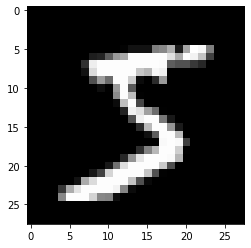

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


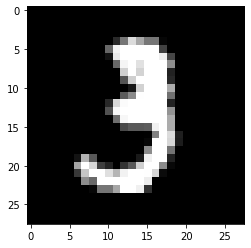

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [10]:
# to convert images into tensors
import torchvision.transforms as transforms

In [11]:
# convert with the function 'ToTensor'
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# first dimension tracks color channels
# second and third dimensions represent pixels along height and width

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
# 0 represents black
# 1 represents white

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


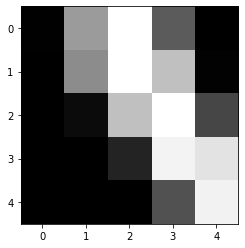

In [14]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Training and Validation Datasets

In [15]:
from torch.utils.data import random_split

In [16]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [17]:
from torch.utils.data import DataLoader

In [18]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [19]:
import torch.nn as nn

In [20]:
input_size = 28*28
num_classes = 10

In [21]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [22]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0333, -0.0268,  0.0009,  ..., -0.0042, -0.0193, -0.0160],
        [-0.0291,  0.0050, -0.0311,  ..., -0.0007,  0.0047,  0.0280],
        [-0.0312, -0.0100, -0.0196,  ...,  0.0009, -0.0164,  0.0340],
        ...,
        [-0.0318,  0.0066,  0.0073,  ...,  0.0090,  0.0233,  0.0128],
        [ 0.0024,  0.0028,  0.0197,  ...,  0.0247,  0.0246,  0.0173],
        [ 0.0237,  0.0167, -0.0274,  ..., -0.0046,  0.0266, -0.0030]],
       requires_grad=True)

In [23]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0021, -0.0102, -0.0047,  0.0263,  0.0094, -0.0060, -0.0211, -0.0062,
         0.0244,  0.0353], requires_grad=True)

In [24]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  print(outputs)
  break

tensor([4, 7, 3, 1, 6, 8, 0, 2, 8, 2, 3, 3, 8, 7, 2, 1, 2, 3, 5, 9, 2, 6, 6, 4,
        1, 4, 1, 1, 3, 9, 0, 0, 9, 8, 7, 3, 3, 7, 9, 4, 1, 1, 4, 3, 8, 3, 1, 6,
        1, 8, 0, 9, 3, 8, 4, 3, 2, 1, 6, 4, 0, 9, 9, 0, 4, 1, 2, 3, 0, 4, 6, 7,
        8, 7, 8, 3, 1, 5, 3, 2, 9, 7, 1, 3, 6, 6, 3, 9, 1, 7, 1, 3, 9, 0, 8, 2,
        1, 6, 5, 0, 3, 6, 3, 5, 3, 0, 2, 9, 5, 5, 4, 4, 8, 6, 9, 5, 0, 9, 1, 1,
        3, 3, 6, 7, 8, 7, 0, 6])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [25]:
images.shape

torch.Size([128, 1, 28, 28])

In [26]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [27]:
class MnistModel(nn.Module):
  def __init__(self):
    # instantiate the weights and biases using nn.Linear
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    
    xb = xb.reshape(-1, 784) # (-1, 28*28) : indicates to pytorch we want a view
                             # of xb tensor in 2D
    out = self.linear(xb)
    return out

model = MnistModel()

In [28]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [29]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0211,  0.0349, -0.0110,  ...,  0.0274, -0.0046,  0.0334],
         [-0.0351,  0.0295, -0.0148,  ..., -0.0317,  0.0056,  0.0297],
         [ 0.0109,  0.0047, -0.0065,  ..., -0.0225, -0.0101, -0.0063],
         ...,
         [ 0.0193,  0.0329, -0.0097,  ...,  0.0080, -0.0249,  0.0076],
         [-0.0214, -0.0327, -0.0122,  ..., -0.0160, -0.0230, -0.0060],
         [ 0.0197,  0.0021, -0.0352,  ...,  0.0006,  0.0354,  0.0136]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0326, -0.0158, -0.0004, -0.0103, -0.0218,  0.0266, -0.0346,  0.0035,
          0.0228,  0.0305], requires_grad=True)]

In [30]:
for images, labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1076, -0.1186,  0.1446,  0.1058, -0.0751,  0.1067, -0.1761,  0.0309,
         -0.0370,  0.2455],
        [ 0.5708, -0.3141,  0.2117,  0.1441, -0.2072,  0.1262, -0.0572, -0.0263,
         -0.0546, -0.0144]])


## Soft Max function

S(y_i) = exp(y_i) / sum{j}(exp(y_j))

In [31]:
import torch.nn.functional as F

In [32]:
outputs[:2]

tensor([[ 0.1076, -0.1186,  0.1446,  0.1058, -0.0751,  0.1067, -0.1761,  0.0309,
         -0.0370,  0.2455],
        [ 0.5708, -0.3141,  0.2117,  0.1441, -0.2072,  0.1262, -0.0572, -0.0263,
         -0.0546, -0.0144]], grad_fn=<SliceBackward0>)

In [33]:
# apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
# .item to get the value
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1069, 0.0852, 0.1109, 0.1067, 0.0890, 0.1068, 0.0805, 0.0990, 0.0925,
         0.1227],
        [0.1655, 0.0683, 0.1156, 0.1080, 0.0760, 0.1061, 0.0884, 0.0911, 0.0886,
         0.0922]])
Sum:  1.0


In [34]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([9, 0, 0, 2, 8, 2, 5, 0, 5, 8, 2, 5, 3, 8, 0, 5, 5, 4, 0, 2, 2, 5, 0, 0,
        8, 5, 2, 2, 0, 0, 5, 2, 2, 2, 0, 1, 2, 6, 0, 0, 0, 6, 2, 0, 2, 2, 8, 8,
        6, 5, 8, 2, 5, 2, 2, 0, 1, 0, 0, 9, 2, 0, 4, 0, 9, 5, 0, 3, 3, 3, 2, 0,
        4, 8, 4, 6, 6, 0, 0, 3, 5, 5, 6, 0, 2, 0, 2, 6, 0, 5, 3, 5, 3, 5, 4, 9,
        0, 7, 5, 2, 2, 2, 0, 2, 5, 5, 8, 3, 2, 5, 3, 6, 5, 3, 3, 2, 0, 6, 6, 0,
        4, 5, 5, 2, 2, 2, 6, 0])
tensor([0.1227, 0.1655, 0.1264, 0.1225, 0.1156, 0.1179, 0.1655, 0.1311, 0.1353,
        0.1421, 0.1285, 0.1283, 0.1364, 0.1221, 0.1146, 0.1628, 0.1213, 0.1229,
        0.1305, 0.1267, 0.1402, 0.1312, 0.1395, 0.1361, 0.1208, 0.1427, 0.1280,
        0.1629, 0.1274, 0.1342, 0.1679, 0.1314, 0.1160, 0.1381, 0.1176, 0.1221,
        0.1395, 0.1276, 0.1313, 0.1302, 0.1585, 0.1251, 0.1163, 0.1141, 0.1287,
        0.1302, 0.1150, 0.1299, 0.1202, 0.1299, 0.1146, 0.1225, 0.1246, 0.1245,
        0.1575, 0.1296, 0.1167, 0.1139, 0.1458, 0.1099, 0.1548, 0.1207, 0.1122,
       

In [35]:
labels

tensor([6, 2, 3, 4, 4, 9, 0, 6, 2, 7, 6, 2, 9, 7, 5, 0, 9, 1, 7, 7, 3, 6, 2, 7,
        9, 0, 2, 8, 7, 0, 0, 5, 4, 0, 9, 7, 0, 2, 6, 7, 0, 0, 1, 9, 5, 6, 7, 7,
        0, 2, 7, 9, 6, 6, 8, 3, 0, 8, 7, 4, 3, 1, 1, 3, 8, 0, 0, 5, 4, 1, 5, 0,
        1, 7, 5, 2, 3, 7, 1, 4, 6, 2, 1, 1, 4, 5, 7, 3, 7, 6, 3, 4, 9, 9, 6, 9,
        2, 5, 6, 6, 9, 6, 1, 9, 2, 0, 7, 0, 8, 4, 8, 1, 9, 8, 8, 3, 2, 9, 0, 2,
        1, 8, 8, 6, 1, 2, 1, 5])

## Evaluation Metric and Loss Function

In [36]:
outputs[:2]

tensor([[ 0.1076, -0.1186,  0.1446,  0.1058, -0.0751,  0.1067, -0.1761,  0.0309,
         -0.0370,  0.2455],
        [ 0.5708, -0.3141,  0.2117,  0.1441, -0.2072,  0.1262, -0.0572, -0.0263,
         -0.0546, -0.0144]], grad_fn=<SliceBackward0>)

In [37]:
torch.sum(preds == labels)

tensor(8)

In [38]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
accuracy(outputs, labels)

tensor(0.0625)

In [40]:
probs

tensor([[0.1069, 0.0852, 0.1109,  ..., 0.0990, 0.0925, 0.1227],
        [0.1655, 0.0683, 0.1156,  ..., 0.0911, 0.0886, 0.0922],
        [0.1264, 0.0700, 0.1057,  ..., 0.1073, 0.0850, 0.0809],
        ...,
        [0.1000, 0.0761, 0.1673,  ..., 0.0954, 0.0784, 0.0963],
        [0.1028, 0.0901, 0.1041,  ..., 0.0958, 0.0988, 0.1035],
        [0.1150, 0.0742, 0.1133,  ..., 0.0905, 0.0920, 0.0999]],
       grad_fn=<SoftmaxBackward0>)

In [41]:
outputs

tensor([[ 0.1076, -0.1186,  0.1446,  ...,  0.0309, -0.0370,  0.2455],
        [ 0.5708, -0.3141,  0.2117,  ..., -0.0263, -0.0546, -0.0144],
        [ 0.3220, -0.2688,  0.1430,  ...,  0.1585, -0.0751, -0.1246],
        ...,
        [ 0.0827, -0.1900,  0.5973,  ...,  0.0362, -0.1604,  0.0450],
        [ 0.0499, -0.0820,  0.0623,  ..., -0.0200,  0.0104,  0.0564],
        [ 0.1829, -0.2552,  0.1675,  ..., -0.0574, -0.0405,  0.0421]],
       grad_fn=<AddmmBackward0>)

In [42]:
loss_fn = F.cross_entropy

In [43]:
# loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3280, grad_fn=<NllLossBackward0>)


# Training the model

In [44]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    # Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [45]:
l1 = [1, 2, 3, 4, 5]
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [46]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [47]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss' : epoch_loss.item(), 'val_acc' : epoch_acc.item()} 

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
model = MnistModel()

In [48]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.11896756291389465, 'val_loss': 2.3238325119018555}

In [49]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9558, val_acc: 0.6215
Epoch [1], val_loss: 1.6842, val_acc: 0.7314
Epoch [2], val_loss: 1.4811, val_acc: 0.7687
Epoch [3], val_loss: 1.3280, val_acc: 0.7916
Epoch [4], val_loss: 1.2102, val_acc: 0.8040


In [50]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1178, val_acc: 0.8136
Epoch [1], val_loss: 1.0438, val_acc: 0.8194
Epoch [2], val_loss: 0.9834, val_acc: 0.8240
Epoch [3], val_loss: 0.9331, val_acc: 0.8286
Epoch [4], val_loss: 0.8907, val_acc: 0.8335


In [51]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8545, val_acc: 0.8364
Epoch [1], val_loss: 0.8231, val_acc: 0.8395
Epoch [2], val_loss: 0.7956, val_acc: 0.8415
Epoch [3], val_loss: 0.7714, val_acc: 0.8437
Epoch [4], val_loss: 0.7499, val_acc: 0.8454


In [52]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7306, val_acc: 0.8477
Epoch [1], val_loss: 0.7132, val_acc: 0.8490
Epoch [2], val_loss: 0.6975, val_acc: 0.8506
Epoch [3], val_loss: 0.6831, val_acc: 0.8525
Epoch [4], val_loss: 0.6699, val_acc: 0.8529


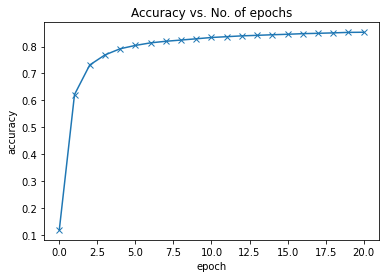

In [53]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');